In [159]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

### P1 - Pandas in Python

In [2]:
tips = sns.load_dataset("tips")

In [4]:
# to_numpy

x = tips.to_numpy()
x

array([[16.99, 1.01, 'Female', ..., 'Sun', 'Dinner', 2],
       [10.34, 1.66, 'Male', ..., 'Sun', 'Dinner', 3],
       [21.01, 3.5, 'Male', ..., 'Sun', 'Dinner', 3],
       ...,
       [22.67, 2.0, 'Male', ..., 'Sat', 'Dinner', 2],
       [17.82, 1.75, 'Male', ..., 'Sat', 'Dinner', 2],
       [18.78, 3.0, 'Female', ..., 'Thur', 'Dinner', 2]], dtype=object)

In [5]:
# sort_index

tips.sort_index(axis=0, ascending=False)

,total_bill,tip,sex,smoker,day,time,size
243,18.78,3.00,Female,No,Thur,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
...,...,...,...,...,...,...,...
4,24.59,3.61,Female,No,Sun,Dinner,4
3,23.68,3.31,Male,No,Sun,Dinner,2
2,21.01,3.50,Male,No,Sun,Dinner,3
1,10.34,1.66,Male,No,Sun,Dinner,3


In [6]:
# sort_values 

tips.sort_values(by='tip', ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6


### P2 - Pandas in Python

In [7]:
# iat

tips.iat[0, 0]

16.99

### P3 - Sampling

In [8]:
# sample with n

tips.tip.sample(n=4)

233    1.47
210    2.00
203    2.50
187    2.00
Name: tip, dtype: float64

In [9]:
# sample with frac

tips.tip.sample(frac=0.02)

174    4.00
221    3.48
37     3.07
217    1.50
44     5.60
Name: tip, dtype: float64

In [10]:
# replace, if true a number can be sampled twice

tips.tip.sample(frac=0.02, replace=True)

220    2.2
67     1.0
212    9.0
149    2.0
140    3.5
Name: tip, dtype: float64

In [11]:
# weights: sample series

from sklearn.preprocessing import scale
weights = abs(scale(tips.tip))  # just to simulate some weights

tips.tip.sample(n=4, weights=weights)

23     7.58
3      3.31
239    5.92
67     1.00
Name: tip, dtype: float64

In [12]:
# weights: sample df

tips.tip.sample(n=4, weights=weights)

140    3.50
12     1.57
59     6.73
27     2.00
Name: tip, dtype: float64

### P4 - Accessing Data

In [13]:
# append

tips.tip.append(pd.Series([99])).reset_index(drop=True)

0       1.01
1       1.66
2       3.50
3       3.31
4       3.61
       ...  
240     2.00
241     2.00
242     1.75
243     3.00
244    99.00
Length: 245, dtype: float64

### P5 - isin, where, mask

In [14]:
# isin: can take dict, but looks like we have to provide all columns
# all vs any

d = {
    "sex": ["Female"],
    "smoker": ["No"],
    "day": ["Sun"],
    "time": ["Dinner"]
}

tips.isin(d).all(axis=1).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [15]:
# where, returns all rows. non-matches will be NaN

tips.where(tips.tip > 2).head()

,total_bill,tip,sex,smoker,day,time,size
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [16]:
# will only return matches

tips[tips.tip > 2].head()

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4


In [17]:
# other, replaces nan

tips[['tip']].where(tips.tip > 2, other=999).head()

,tip
0,999.00
1,999.00
2,3.50
3,3.31
4,3.61


In [18]:
# mask, exact opposite of where

tips[['tip']].mask(tips.tip > 2, other=999).head()

,tip
0,1.01
1,1.66
2,999.00
3,999.00
4,999.00


In [19]:
# where match, replace with another column

tips[['tip']].where(tips[['tip']] > 3, tips['total_bill'], axis=0).head()

,tip
0,16.99
1,10.34
2,3.50
3,3.31
4,3.61


### P6 - duplicates

In [20]:
# duplicated, keep (first, last, False)

tips.duplicated(['sex', 'time', 'smoker', 'day', 'size'], keep='first')

0      False
1      False
2       True
3      False
4      False
       ...  
239     True
240     True
241     True
242     True
243    False
Length: 244, dtype: bool

In [21]:
# get by index

tips['sex'].get(1)

'Male'

### P7 - Index

In [22]:
# append

tips.set_index("sex", append=True).head()

,,total_bill,tip,smoker,day,time,size
,sex,,,,,,
0,Female,16.99,1.01,No,Sun,Dinner,2
1,Male,10.34,1.66,No,Sun,Dinner,3
2,Male,21.01,3.50,No,Sun,Dinner,3
3,Male,23.68,3.31,No,Sun,Dinner,2
4,Female,24.59,3.61,No,Sun,Dinner,4


### P9 - Concat & Append

In [23]:
tips1 = tips.sample(frac=.5)
tips2 = tips.sample(frac=.5)

In [24]:
# keys 

tips_concat = pd.concat([tips1, tips2], keys=['a', 'b'])
tips_concat.head()

total_bill   tip     sex smoker  day    time  size
a 161       12.66  2.50    Male     No  Sun  Dinner     2
  173       31.85  3.18    Male    Yes  Sun  Dinner     2
  57        26.41  1.50  Female     No  Sat  Dinner     2
  32        15.06  3.00  Female     No  Sat  Dinner     2
  92         5.75  1.00  Female    Yes  Fri  Dinner     2

In [25]:
tips_concat.loc['b'].head()

,total_bill,tip,sex,smoker,day,time,size
229,22.12,2.88,Female,Yes,Sat,Dinner,2
141,34.30,6.70,Male,No,Thur,Lunch,6
137,14.15,2.00,Female,No,Thur,Lunch,2
208,24.27,2.03,Male,Yes,Sat,Dinner,2
201,12.74,2.01,Female,Yes,Thur,Lunch,2


In [26]:
# axis=1, join

pd.concat([tips1, tips2], axis=1, join='outer')

,total_bill,tip,sex,smoker,day,time,size,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3.0,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0,21.01,3.50,Male,No,Sun,Dinner,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.68,3.31,Male,No,Sun,Dinner,2.0
5,25.29,4.71,Male,No,Sun,Dinner,4.0,25.29,4.71,Male,No,Sun,Dinner,4.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.77,2.00,Male,No,Sun,Dinner,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,32.83,1.17,Male,Yes,Sat,Dinner,2.0,32.83,1.17,Male,Yes,Sat,Dinner,2.0
238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.83,4.67,Female,No,Sat,Dinner,3.0
240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.18,2.00,Female,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# reindex, adopt index of another dataframe,
# if the index of the right-hand df is not available inn the left db
# the records will be null

tips1.reindex(tips2.index)

,total_bill,tip,sex,smoker,day,time,size
229,22.12,2.88,Female,Yes,Sat,Dinner,2.0
141,34.30,6.70,Male,No,Thur,Lunch,6.0
137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
49,18.04,3.00,Male,No,Sun,Dinner,2.0
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,34.81,5.20,Female,No,Sun,Dinner,4.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0


In [28]:
# appendinng more than 2 df

tips1.append([tips2, tips]).head()

,total_bill,tip,sex,smoker,day,time,size
161,12.66,2.50,Male,No,Sun,Dinner,2
173,31.85,3.18,Male,Yes,Sun,Dinner,2
57,26.41,1.50,Female,No,Sat,Dinner,2
32,15.06,3.00,Female,No,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2


In [29]:
# ignore_index 

pd.concat([tips1, tips2], ignore_index=True).head()

,total_bill,tip,sex,smoker,day,time,size
0,12.66,2.50,Male,No,Sun,Dinner,2
1,31.85,3.18,Male,Yes,Sun,Dinner,2
2,26.41,1.50,Female,No,Sat,Dinner,2
3,15.06,3.00,Female,No,Sat,Dinner,2
4,5.75,1.00,Female,Yes,Fri,Dinner,2


In [36]:
# validate = 'one_to_one', 'one_to_many' etc

pd.merge(tips1, tips2, on=['sex', 'smoker', 'day', 'time', 'size'], validate='many_to_many').head()

,total_bill_x,tip_x,sex,smoker,day,time,size,total_bill_y,tip_y
0,12.66,2.5,Male,No,Sun,Dinner,2,13.94,3.06
1,12.66,2.5,Male,No,Sun,Dinner,2,10.27,1.71
2,12.66,2.5,Male,No,Sun,Dinner,2,14.07,2.50
3,12.66,2.5,Male,No,Sun,Dinner,2,12.66,2.50
4,12.66,2.5,Male,No,Sun,Dinner,2,15.04,1.96


In [37]:
# indicator, most helpful when how='outer'

pd.merge(tips1, tips2, on=['sex', 'smoker', 'day', 'time', 'size'], indicator='indic_col').head()

,total_bill_x,tip_x,sex,smoker,day,time,size,total_bill_y,tip_y,indic_col
0,12.66,2.5,Male,No,Sun,Dinner,2,13.94,3.06,both
1,12.66,2.5,Male,No,Sun,Dinner,2,10.27,1.71,both
2,12.66,2.5,Male,No,Sun,Dinner,2,14.07,2.50,both
3,12.66,2.5,Male,No,Sun,Dinner,2,12.66,2.50,both
4,12.66,2.5,Male,No,Sun,Dinner,2,15.04,1.96,both


In [44]:
# combine_first

df1 = pd.DataFrame({
    "A": [np.nan, 999],
    "B": [7, np.nan]
})
df1.head()

,A,B
0,NaN,7.0
1,999.0,NaN


In [45]:
df2 = pd.DataFrame({
    "A": [np.nan, 1],
    "B": [777, 8687]
})
df2.head()

,A,B
0,NaN,777
1,1.0,8687


In [46]:
# NaN in the df1 is replaced with non-null value in df2

df1.combine_first(df2)

,A,B
0,NaN,7.0
1,999.0,8687.0


In [47]:
# updates the non-null values as well

df1.update(df2)
df1.head()

,A,B
0,NaN,777.0
1,1.0,8687.0


### P10 - Pivot, stack, unstack

In [51]:
df1 = pd.DataFrame({
    'month': ['jan', 'jan', 'jan', 'mar', 'mar', 'mar', 'dec'],
    'day': ['mon', 'wed', 'thu', 'mon', 'wed', 'thu', 'mon'],
    'A': [1, 2, 3, 4, 5, 6, 7],
    'B': [10, 20, 30, 40, 50, 60, 70],
})

df1.head()

,month,day,A,B
0,jan,mon,1,10
1,jan,wed,2,20
2,jan,thu,3,30
3,mar,mon,4,40
4,mar,wed,5,50


In [59]:
tuple_list1 = list(zip(
    ['rain', 'rain', 'wind', 'wind'],
    ['stone', 'river', 'stone', 'river']
))

index2 = pd.MultiIndex.from_tuples(tuple_list1, names=['weather', 'geology'])

df2 = pd.DataFrame(
    {
        'day': ['sun', 'sun', 'tue', 'tue'],
        'time': ['morning', 'evening', 'morning', 'evening'],
        'harvest': [1, 2, 3, 4],
        'seed': [12, 23, 34, 45]
    },
    index=index2
)

df2.head()

day     time  harvest  seed
weather geology                             
rain    stone    sun  morning        1    12
        river    sun  evening        2    23
wind    stone    tue  morning        3    34
        river    tue  evening        4    45

In [61]:
index3 = pd.MultiIndex.from_product([[3, 1], [9, 0]])
df3 = pd.DataFrame(np.random.randn(4), index=index3, columns=["Z"])
df3.head()

Z
3 9  0.509486
  0 -0.649687
1 9 -1.143977
  0  1.596885

In [65]:
tuple_index4 = list(zip(
    ['tree', 'tree', 'tree', 'leaves', 'leaves', 'leaves'],
    ['plant', 'plant', 'soil', 'soil', 'fruit', 'fruit'],
    ['rain', 'cloud', 'rain', 'cloud', 'rain', 'cloud'],
))

index4 = pd.MultiIndex.from_tuples(tuple_index4, names=['Forest', 'Farm', 'Weather'])
df4 = pd.DataFrame(
    {
        'A': [1, 2, 3, 4, 5, 6],
        'B': [55, 66, 77, 88, 99, 100],
    },
    index=index4
)
df4.head(6)

A    B
Forest Farm  Weather        
tree   plant rain     1   55
             cloud    2   66
       soil  rain     3   77
leaves soil  cloud    4   88
       fruit rain     5   99
             cloud    6  100

In [72]:
columns = pd.MultiIndex.from_tuples([
    ('car', 'petrol'),
    ('truck', 'diesel'),
    ('truck', 'diesel'),
    ('car', 'petrol')],
    names=['vehicle', 'fuel']
)

index = pd.MultiIndex.from_product(
    [
        ('tar_road', 'concrete_road', 'gravel_road', 'mud_road'),
        ('one_way', 'two_way')
    ],
    names=['transp', 'freq']
)

df5 = pd.DataFrame(
    np.random.randint(10, 30, (8, 4)),
    columns=columns,
    index=index
)
df5.head()

vehicle                  car  truck           car
fuel                  petrol diesel diesel petrol
transp        freq                               
tar_road      one_way     17     11     19     23
              two_way     26     21     10     14
concrete_road one_way     15     11     21     24
              two_way     25     16     23     16
gravel_road   one_way     26     13     17     17

In [77]:
df6 = pd.DataFrame({
    'month': ['jan', 'jan', 'jan', 'jan', 'jan', 'feb', 'feb', 'feb', 'feb', 'feb'],
    'week': ['first', 'first', 'first', 'second', 'second', 'first', 'first', 'first', 'second', 'second'],
    'suger_sold': [10, 5, 20, 11, 19, 34, 54, 23, 12, 29],
    'salt_sold': [22, 44, 55, 44, 66, 33, 55, 67, 33, 56],
})

df6.head()

,month,week,suger_sold,salt_sold
0,jan,first,10,22
1,jan,first,5,44
2,jan,first,20,55
3,jan,second,11,44
4,jan,second,19,66


#### pivot

In [76]:
df1

,month,day,A,B
0,jan,mon,1,10
1,jan,wed,2,20
2,jan,thu,3,30
3,mar,mon,4,40
4,mar,wed,5,50
5,mar,thu,6,60
6,dec,mon,7,70


In [81]:
df1_pivot = df1.pivot(index='month', columns='day', values=['A', 'B'])
df1_pivot

A               B            
day    mon  thu  wed   mon   thu   wed
month                                 
dec    7.0  NaN  NaN  70.0   NaN   NaN
jan    1.0  3.0  2.0  10.0  30.0  20.0
mar    4.0  6.0  5.0  40.0  60.0  50.0

In [83]:
df1_pivot['B']

day,mon,thu,wed
month,,,
dec,70.0,NaN,NaN
jan,10.0,30.0,20.0
mar,40.0,60.0,50.0


#### stack

In [85]:
df2

day     time  harvest  seed
weather geology                             
rain    stone    sun  morning        1    12
        river    sun  evening        2    23
wind    stone    tue  morning        3    34
        river    tue  evening        4    45

In [105]:
# level 

df2_stacked = df2.stack(level=0)
df2_stacked

weather  geology         
rain     stone    day            sun
                  time       morning
                  harvest          1
                  seed            12
         river    day            sun
                  time       evening
                  harvest          2
                  seed            23
wind     stone    day            tue
                  time       morning
                  harvest          3
                  seed            34
         river    day            tue
                  time       evening
                  harvest          4
                  seed            45
dtype: object

In [107]:
# level 

df2_stacked.unstack(level='weather')   # or level = 0

weather             rain     wind
geology                          
river   day          sun      tue
        time     evening  evening
        harvest        2        4
        seed          23       45
stone   day          sun      tue
        time     morning  morning
        harvest        1        3
        seed          12       34

#### sort during stack/unstack

In [109]:
df3

Z
3 9  0.509486
  0 -0.649687
1 9 -1.143977
  0  1.596885

In [111]:
# indeces are sorted after unstach/stack

df3.unstack().stack()

Z
1 0  1.596885
  9 -1.143977
3 0 -0.649687
  9  0.509486

#### pivot_table

In [123]:
df6

,month,week,suger_sold,salt_sold
0,jan,first,10,22
1,jan,first,5,44
2,jan,first,20,55
3,jan,second,11,44
4,jan,second,19,66
5,feb,first,34,33
6,feb,first,54,55
7,feb,first,23,67
8,feb,second,12,33
9,feb,second,29,56


In [ ]:
# index contains duplicate records, cannot reshape

df6.pivot(index='month', columns='week', values='suger_sold')

In [127]:
# we get mean values! 

df6.pivot_table(index='month', columns='week', values='suger_sold', aggfunc=np.mean)

week,first,second
month,,
feb,37.000000,20.5
jan,11.666667,15.0


### P11 - Groupby, Melt, Stack, Unstack, Get Dummies

In [130]:
df1 = pd.DataFrame({
    'month': ['jan', 'jan', 'jan', 'mar', 'mar', 'mar'],
    'day': ['mon', 'wed', 'thu', 'mon', 'wed', 'thu'],
    'A': [1, 2, 3, 4, 5, 6],
    'B': [10, 20, 30, 40, 50, 60],
})

df1

,month,day,A,B
0,jan,mon,1,10
1,jan,wed,2,20
2,jan,thu,3,30
3,mar,mon,4,40
4,mar,wed,5,50
5,mar,thu,6,60


In [131]:
np.random.seed(9)

df7 = pd.DataFrame({
    "car1990": [25, 22, 23, 20],
    "car2000": [22, 23, 25, 27],
    "car2010": [25, 24, 27, 30],
    "bike1990": [78, 79, 67, 66],
    "bike2000": [78, 79, 88, 77],
    "bike2010": [88, 85, 90, 79],
    "rating": np.random.randint(1, 5, 4),
    "end_use": ["race", "commute", "offroad", "transport"],
    "surface": ["tar", "concrete", "gravel", "mixed"]
})

df7["id"] = df7.index
df7

,car1990,car2000,car2010,bike1990,bike2000,bike2010,rating,end_use,surface,id
0,25,22,25,78,78,88,3,race,tar,0
1,22,23,24,79,79,85,1,commute,concrete,1
2,23,25,27,67,88,90,3,offroad,gravel,2
3,20,27,30,66,77,79,2,transport,mixed,3


#### melt

In [134]:
df1

,month,day,A,B
0,jan,mon,1,10
1,jan,wed,2,20
2,jan,thu,3,30
3,mar,mon,4,40
4,mar,wed,5,50
5,mar,thu,6,60


In [136]:
df1.melt(id_vars=["month", "day"], var_name='chars').head()

,month,day,chars,value
0,jan,mon,A,1
1,jan,wed,A,2
2,jan,thu,A,3
3,mar,mon,A,4
4,mar,wed,A,5


#### wide_to_long

In [139]:
df7

,car1990,car2000,car2010,bike1990,bike2000,bike2010,rating,end_use,surface,id
0,25,22,25,78,78,88,3,race,tar,0
1,22,23,24,79,79,85,1,commute,concrete,1
2,23,25,27,67,88,90,3,offroad,gravel,2
3,20,27,30,66,77,79,2,transport,mixed,3


In [150]:
pd.wide_to_long(df7, stubnames=['car', 'bike'], i='id', j='year').head()

,,end_use,surface,rating,car,bike
id,year,,,,,
0,1990,race,tar,3,25,78
1,1990,commute,concrete,1,22,79
2,1990,offroad,gravel,3,23,67
3,1990,transport,mixed,2,20,66
0,2000,race,tar,3,22,78


In [149]:
dfn = df1.copy()
dfn['C'] = dfn['A'] * 2
dfn['D'] = dfn['B'] * 2

dfn = dfn.set_index(['month', 'day'])

dfn.columns = pd.MultiIndex.from_product(
    [
        ('lower', 'upper'),
        ('A', 'B'),
    ],
    names=['floor', 'unit']
)

dfn

floor     lower     upper     
unit          A   B     A    B
month day                     
jan   mon     1  10     2   20
      wed     2  20     4   40
      thu     3  30     6   60
mar   mon     4  40     8   80
      wed     5  50    10  100
      thu     6  60    12  120

In [153]:
# level & axis in groupby

dfn.groupby(level=1, axis=1).mean()

unit         A     B
month day           
jan   mon  1.5  15.0
      wed  3.0  30.0
      thu  4.5  45.0
mar   mon  6.0  60.0
      wed  7.5  75.0
      thu  9.0  90.0

#### get_dummies

In [154]:
df1

,month,day,A,B
0,jan,mon,1,10
1,jan,wed,2,20
2,jan,thu,3,30
3,mar,mon,4,40
4,mar,wed,5,50
5,mar,thu,6,60


In [161]:
# get_dummies

pd.get_dummies(df1, columns=['month'], prefix='m')

,day,A,B,m_jan,m_mar
0,mon,1,10,1,0
1,wed,2,20,1,0
2,thu,3,30,1,0
3,mon,4,40,0,1
4,wed,5,50,0,1
5,thu,6,60,0,1


In [160]:
# multiple cols

pd.get_dummies(df1, columns=['month', 'day'], prefix={"month": 'm', "day": "d"})

,A,B,m_jan,m_mar,d_mon,d_thu,d_wed
0,1,10,1,0,1,0,0
1,2,20,1,0,0,0,1
2,3,30,1,0,0,1,0
3,4,40,0,1,1,0,0
4,5,50,0,1,0,0,1
5,6,60,0,1,0,1,0


In [162]:
# drop_first

pd.get_dummies(df1, columns=['month', 'day'], prefix={"month": 'm', "day": "d"}, drop_first=True)

,A,B,m_mar,d_thu,d_wed
0,1,10,0,0,0
1,2,20,0,0,1
2,3,30,0,1,0
3,4,40,1,0,0
4,5,50,1,0,1
5,6,60,1,1,0


In [163]:
# values & aggfunc

pd.crosstab(df1['month'], df1['day'], values=df1['A'], aggfunc=sum)

day,mon,thu,wed
month,,,
jan,1,3,2
mar,4,6,5


### P12 - Strings

In [164]:
x = pd.Series(["This is a Sentence", np.nan, 'IS IT?'])
x

0    This is a Sentence
1                   NaN
2                IS IT?
dtype: object

In [165]:
# lower, upper, len

x.str.lower()

0    this is a sentence
1                   NaN
2                is it?
dtype: object

In [172]:
# lstrip, rstrip, strip

x = pd.Series([' left', 'nospace', 'right '])
list(x)

[' left', 'nospace', 'right ']

In [173]:
list(x.str.lstrip())

['left', 'nospace', 'right ']

In [174]:
a = pd.Series(['x', 'y', 'z'], dtype='str')
a

0    x
1    y
2    z
dtype: object

In [178]:
# cat, sep

a.str.cat(sep=', ')

'x, y, z'

In [181]:
# na_rep

a = pd.Series(['x', 'y', np.nan, 'z'], dtype='str')
print(a.str.cat(sep=', '))
print(a.str.cat(sep=', ', na_rep='-'))

x, y, z
x, y, -, z


In [183]:
# concat two series 

a = pd.Series(['x', 'y', 'z', np.nan])
b = pd.Series(['X', 'Y', 'Z', 'Q'])

a.str.cat(b, na_rep='-')

0    xX
1    yY
2    zZ
3    -Q
dtype: object

#### concat using index

In [189]:
print(a)
print("=" * 10)
print(b)

0      x
1      y
2      z
3    NaN
dtype: object
0    X
1    Y
2    Z
3    Q
dtype: object


In [ ]:
# shuffle b index

b.index = pd.Index([3, 2, 1, 0])

In [191]:
# join on index

a.str.cat(b, join='left', na_rep='-')

0    xX
1    yY
2    zZ
3    -Q
dtype: object

### P12 - Regex

In [195]:
s = 'dfa$ ab&cdeabb&98 abcd f12_abbbb&gh$[a \
lsjfdlj ljkfd'

In [204]:
# match, group, start, end, span

m = re.match('dfa', s)  # looks at the beginning of a string
print(m)

print(m.group())
print(m.start())
print(m.end())
print(m.span())

<re.Match object; span=(0, 3), match='dfa'>
dfa
0
3
(0, 3)


In [205]:
# search: looks through entire string, and returns the match

sr = re.search("fa", s)
sr

<re.Match object; span=(1, 3), match='fa'>

In [206]:
# finadall, returns a list

re.findall("fa", s)

['fa']

In [211]:
# finditer

m = re.finditer("fa", s)
for i in m:
    print(i.group(), i.start(), i.end())

fa 1 3


In [213]:
# split

s = "This is some text"
re.split('\s', s)

['This', 'is', 'some', 'text']

In [214]:
# sub 

re.sub("\s", " * ", s)

'This * is * some * text'

In [215]:
# subn, sub only n times

re.subn("\s", " * ", s, 2)

('This * is * some text', 2)

### P13 - Extract

In [3]:
s = pd.Series(['m1', 'n2', 'o3', '4'])
s

0    m1
1    n2
2    o3
3     4
dtype: object

In [12]:
# column names are 0, 1

p = r'([mn])(\d)'

s.str.extract(p, expand=False)

,0,1
0,m,1
1,n,2
2,NaN,NaN
3,NaN,NaN


In [13]:
# ?P specify the column names

p = r'(?P<letter>[mn])(?P<number>\d)'

s.str.extract(p, expand=False)

,letter,number
0,m,1
1,n,2
2,NaN,NaN
3,NaN,NaN


In [14]:
# ? optional

p = r'([mn])?(\d)'
x = s.str.extract(p, expand=False)
x

,0,1
0,m,1
1,n,2
2,NaN,3
3,NaN,4


In [17]:
# expand=False, returns series

p = r'[mn](\d)'

x = s.str.extract(p, expand=False)
x

0      1
1      2
2    NaN
3    NaN
dtype: object

In [18]:
# expand=True, returns dataframe

p = r'[mn](\d)'

x = s.str.extract(p, expand=True)
x

,0
0,1
1,2
2,NaN
3,NaN


In [20]:
# search in index

s.index = ['M1', 'N2', 'O3', 'Q4']
s

M1    m1
N2    n2
O3    o3
Q4     4
dtype: object

In [21]:
p = r'[MN](?P<number>\d)'
x = s.index.str.extract(p, expand=False)
x

Index(['1', '2', nan, nan], dtype='object', name='number')

In [24]:
# expand=True

p = r'[MN](?P<number>\d)'
x = s.index.str.extract(p, expand=True)
x

,number
0,1
1,2
2,NaN
3,NaN


In [29]:
# extract all

s[0] = 'm1m2'
s

M1    m1m2
N2      n2
O3      o3
Q4       4
dtype: object

In [31]:
# extract all, breaks the first row into two rowes

p = r'(?P<letter>[a-zA-Z])(?P<number>\d)'

s.str.extractall(p)

letter number
   match              
M1 0          m      1
   1          m      2
N2 0          n      2
O3 0          o      3

In [32]:
# contains

s = pd.Series(['0a2', '3bb', '4', 'q'])
s

0    0a2
1    3bb
2      4
3      q
dtype: object

In [34]:
p = r'[0-9][a-z][0-9]'
x = s.str.contains(p)
x

0     True
1    False
2    False
3    False
dtype: bool

In [36]:
# match, starts at the beginning of the string 
# while search starts in the middle of the string

s.str.match(p)

0     True
1    False
2    False
3    False
dtype: bool

In [39]:
# get_dummies with sep

s = pd.Series(['m', 'm|n', 'n|q', np.nan], dtype='str')
print(s)

x = s.str.get_dummies(sep='|')
x

0      m
1    m|n
2    n|q
3    NaN
dtype: object


,m,n,q
0,1,0,0
1,1,1,0
2,0,1,1
3,0,0,0


In [41]:
s.index = ['M', 'M|N', 'N|Q', np.nan]
s

M        m
M|N    m|n
N|Q    n|q
NaN    NaN
dtype: object

In [42]:
# get_dummies wo sep

x = s.index.str.get_dummies(sep='|')
x

MultiIndex([(1, 0, 0),
            (1, 1, 0),
            (0, 1, 1),
            (0, 0, 0)],
           names=['M', 'N', 'Q'])

### P15 - missing values

In [53]:
None == None

True

In [55]:
np.nan == np.nan

False

In [57]:
# sidenote

a = pd.DataFrame(
    {'x': [1, 2, 3]},
    index=[11, 12, 0]
)
a

,x
11,1
12,2
0,3


In [58]:
a.loc[0]

x    3
Name: 0, dtype: int64

In [59]:
a.iloc[0]

x    1
Name: 11, dtype: int64

### P16 - fillna, dropna

In [8]:
df = pd.DataFrame({
    'x': np.random.randint(0,5, 5),
    'y': [np.nan,'B',None,'A','C'],
    'z': [True, False, False, np.nan, True]
    },
    index=pd.Series([11,13,15,17,20])
)
df2 = df.reindex([11,12,13,14,15,17,18,19,20])
df2

,x,y,z
11,0.0,NaN,True
12,NaN,NaN,NaN
13,3.0,B,False
14,NaN,NaN,NaN
15,1.0,None,False
17,4.0,A,NaN
18,NaN,NaN,NaN
19,NaN,NaN,NaN
20,4.0,C,True


In [4]:
# fillna, limit
# pad is the same as ffill

df2.fillna(method='pad', limit=1)

,x,y,z
11,3.0,NaN,True
12,3.0,NaN,True
13,0.0,B,False
14,0.0,B,False
15,4.0,None,False
17,1.0,A,False
18,1.0,A,NaN
19,NaN,NaN,NaN
20,4.0,C,True


In [25]:
# where

df2.where(pd.notna(df2), "99", axis=0)

,x,y,z
11,0.0,99,True
12,99,99,99
13,3.0,B,False
14,99,99,99
15,1.0,99,False
17,4.0,A,99
18,99,99,99
19,99,99,99
20,4.0,C,True


### P17 - interpolate

#### tables we need


In [26]:
a = pd.Series([np.nan, np.nan, -100, np.nan, np.nan, np.nan, 4, np.nan, 6, np.nan, np.nan, 36, np.nan, np.nan, np.nan, np.nan, 36])
b = pd.Series([0.1, 0.2, np.nan, 0.4, np.nan, np.nan, 0.7])

m = [0, 1, np.nan, 4, np.nan, np.nan, 6, np.nan, np.nan, 10]
n = [0, 20,  40, np.nan, 43, 45, 46, np.nan, np.nan, 50]
dfmn = pd.DataFrame({
    'm': m,
    'n': n
})

In [27]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
dfx = pd.DataFrame({
    'x_orig': x,
    'y_orig': y,
    'x': x,
    'y': y,
})

dfx.loc[np.r_[5:8, 13:17, 20:24, 24:28], ['y']] = np.nan
dfx.loc[np.r_[1:4, 6:8, 20:24, 10:13], ['x']] = np.nan

In [51]:
dt = [
    '20200101',
    '20200102',
    '20200103',
    '20200104',
    '20200105',
    '20200106',
    '20200107',
    '20200108',
    '20200109',
    "20200110",
]

x_orig = np.random.randn(10)
dft = pd.DataFrame({'dt': dt, 'x_orig': x_orig})
dft['dt'] = dft.apply(lambda x: pd.Timestamp(x['dt']), axis=1)
dft['x'] = dft['x_orig']
dft.loc[np.r_[3, 4, 6:8], 'x'] = np.nan
dft['y_orig'] = np.linspace(1, 10, 10) ** 2
dft['y'] = dft['y_orig']
dft.loc[np.r_[3, 4, 6:8], 'y'] = np.nan
dft.set_index('dt', inplace=True, drop=True)

In [52]:
dft.head()

,x_orig,x,y_orig,y
dt,,,,
2020-01-01,0.967997,0.967997,1.0,1.0
2020-01-02,-0.931194,-0.931194,4.0,4.0
2020-01-03,-0.751451,-0.751451,9.0,9.0
2020-01-04,-0.948800,NaN,16.0,NaN
2020-01-05,-1.298903,NaN,25.0,NaN


In [53]:
# interpolate, by default it is using linear

dft.interpolate(method='time')

,x_orig,x,y_orig,y
dt,,,,
2020-01-01,0.967997,0.967997,1.0,1.0
2020-01-02,-0.931194,-0.931194,4.0,4.0
2020-01-03,-0.751451,-0.751451,9.0,9.0
2020-01-04,-0.948800,-0.347035,16.0,18.0
2020-01-05,-1.298903,0.057380,25.0,27.0
2020-01-06,0.461796,0.461796,36.0,36.0
2020-01-07,0.315058,0.102203,49.0,51.0
2020-01-08,-0.315056,-0.257390,64.0,66.0
2020-01-09,-0.616982,-0.616982,81.0,81.0


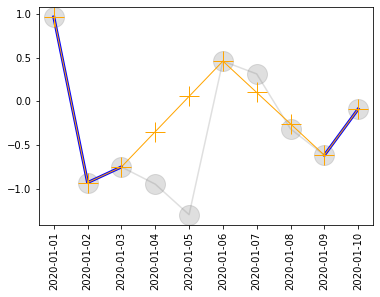

In [54]:
plt.plot(dft.index, dft['x_orig'], marker='o', markersize=20, alpha=0.25, color='gray')
plt.plot(dft.index, dft['x'], color='blue', lw=3)
plt.plot(dft.index, dft['x'].interpolate(method='time'), marker='+', markersize=20, color='orange', lw=1)
plt.xticks(rotation=90);

#### method='values'

In [56]:
b

0    0.1
1    0.2
2    NaN
3    0.4
4    NaN
5    NaN
6    0.7
dtype: float64

In [57]:
b.interpolate(method='values')

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
5    0.6
6    0.7
dtype: float64

#### methods: linear, quadratic, cubic, polynomial, spline, piecewise_polynomial, krogh, barycenteric, pchip, akima

In [59]:
a

0       NaN
1       NaN
2    -100.0
3       NaN
4       NaN
5       NaN
6       4.0
7       NaN
8       6.0
9       NaN
10      NaN
11     36.0
12      NaN
13      NaN
14      NaN
15      NaN
16     36.0
dtype: float64

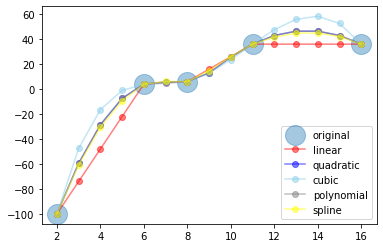

In [81]:
plt.scatter(a.index, a, label='original', s=400, alpha=0.4)
plt.plot(a.index, a.interpolate(method='linear'), color='red', marker='o', label='linear', alpha=0.5);
plt.plot(a.index, a.interpolate(method='quadratic'), color='blue', marker='o', label='quadratic', alpha=0.5);
plt.plot(a.index, a.interpolate(method='cubic'), color='skyblue', marker='o', label='cubic', alpha=0.5);
plt.plot(a.index, a.interpolate(method='polynomial', order=2), color='gray', marker='o', label='polynomial', alpha=0.5);
plt.plot(a.index, a.interpolate(method='spline', order=2), color='yellow', marker='o', label='spline', alpha=0.5);
plt.legend();

In [82]:
# limit, limit_direction, limit_area

a.interpolate(limit_direction='both', limit_area='inside', limit=1)

0       NaN
1       NaN
2    -100.0
3     -74.0
4       NaN
5     -22.0
6       4.0
7       5.0
8       6.0
9      16.0
10     26.0
11     36.0
12     36.0
13      NaN
14      NaN
15     36.0
16     36.0
dtype: float64

### P18 - replace()

In [84]:
a = pd.Series([11, 22, 33, 44])
a

0    11
1    22
2    33
3    44
dtype: int64

In [85]:
dfr = pd.DataFrame({
    "A": [11, 22, 33, 44, 55],
    "B": ["m", "*", "*", "**", "n"],
    "C": ["i", np.nan, np.nan, "j", "k"]
})

dfr

,A,B,C
0,11,m,i
1,22,*,NaN
2,33,*,NaN
3,44,**,j
4,55,n,k


In [86]:
# replace

a.replace(11, 999)

0    999
1     22
2     33
3     44
dtype: int64

In [87]:
a.replace({11: 999, 22: 888})

0    999
1    888
2     33
3     44
dtype: int64

In [91]:
dfr.replace(["*", "**"], 999)

,A,B,C
0,11,m,i
1,22,999,NaN
2,33,999,NaN
3,44,999,j
4,55,n,k


In [93]:
# regex

dfr.replace(r"\*", 999, regex=True)

,A,B,C
0,11,m,i
1,22,999,NaN
2,33,999,NaN
3,44,999,j
4,55,n,k


In [99]:
dfr.replace([r'(\*)'], ['Star'], regex=True)

,A,B,C
0,11,m,i
1,22,Star,NaN
2,33,Star,NaN
3,44,StarStar,j
4,55,n,k


### P19 - Categorical Data

In [100]:
a = pd.Series(['m', 'n', 'o', 'p', 'm', 'n'])
a

0    m
1    n
2    o
3    p
4    m
5    n
dtype: object

In [105]:
dfr = pd.DataFrame({
    'GeoID': [910291, 933822, 964834, 936384, 968484, 918242, 924353],
    'Rainfall_mmph': [7.4, 1.3, 3.9, 5.2, 0.1, 79, 24]
})
dfr

,GeoID,Rainfall_mmph
0,910291,7.4
1,933822,1.3
2,964834,3.9
3,936384,5.2
4,968484,0.1
5,918242,79.0
6,924353,24.0


In [107]:
dfc = pd.DataFrame({
    'CustomerID': [10000012, 10000014, 10000044, 10000013, 10000023, 10000067],
    'VisitsPerWeek': [6, 36, 12, 1, 27, 10],
    'CustomerSatisfaction': ['Poor', 'Excellent', 'Average', 'Bad', 'Good', 'Poor'],
    'code': [1, 4, 2, 0, 3, 1]
})

dfc

,CustomerID,VisitsPerWeek,CustomerSatisfaction,code
0,10000012,6,Poor,1
1,10000014,36,Excellent,4
2,10000044,12,Average,2
3,10000013,1,Bad,0
4,10000023,27,Good,3
5,10000067,10,Poor,1


In [109]:
# dtype = category

a = pd.Series(['m', 'n', 'o', 'p', 'm', 'n'], dtype='category')
a

0    m
1    n
2    o
3    p
4    m
5    n
dtype: category
Categories (4, object): ['m', 'n', 'o', 'p']

In [119]:
# astype: category

df = pd.DataFrame({
    "A": ["m", "n", "o", "p", "m", "n"]
})
df['B'] = df['A'].astype('category')

df.dtypes

A      object
B    category
dtype: object

In [126]:
# binning

rr = [0.01, 2.5, 10, 50, 100]

rr_labels = ["{0} upto {1}".format(rr[i], rr[i+1]) for i in range(len(rr) - 1)]
rr_labels

['0.01 upto 2.5', '2.5 upto 10', '10 upto 50', '50 upto 100']

In [131]:
# cut

dfr['rain_category'] = pd.cut(dfr['Rainfall_mmph'], rr, right=False, labels=rr_labels)
dfr

,GeoID,Rainfall_mmph,rain_category
0,910291,7.4,2.5 upto 10
1,933822,1.3,0.01 upto 2.5
2,964834,3.9,2.5 upto 10
3,936384,5.2,2.5 upto 10
4,968484,0.1,0.01 upto 2.5
5,918242,79.0,50 upto 100
6,924353,24.0,10 upto 50


In [132]:
dfr.dtypes

GeoID               int64
Rainfall_mmph     float64
rain_category    category
dtype: object

In [133]:
# Categorical

rcat = pd.Categorical(['medium', 'light', 'medium', 'medium', 'light', 'violent', 'heavy'])
dfr['rain_category2'] = rcat
dfr

,GeoID,Rainfall_mmph,rain_category,rain_category2
0,910291,7.4,2.5 upto 10,medium
1,933822,1.3,0.01 upto 2.5,light
2,964834,3.9,2.5 upto 10,medium
3,936384,5.2,2.5 upto 10,medium
4,968484,0.1,0.01 upto 2.5,light
5,918242,79.0,50 upto 100,violent
6,924353,24.0,10 upto 50,heavy


In [134]:
dfr.dtypes

GeoID                int64
Rainfall_mmph      float64
rain_category     category
rain_category2    category
dtype: object

In [135]:
# adding a categorical column while creating a df

dfx = pd.DataFrame({
    "x": ['m', 'n', 'o'],
    "y": ["o", "p", "q"]},
    dtype='category'
)

dfx.dtypes

x    category
y    category
dtype: object

In [138]:
# CategoricalDtype

from pandas.api.types import CategoricalDtype

a = pd.Series(['m', 'n', 'o', 'p', 'm', 'n'])
a

0    m
1    n
2    o
3    p
4    m
5    n
dtype: object

In [139]:
cat_type = CategoricalDtype(categories=['m', 'o', 'p'], ordered=True)
cat_type

CategoricalDtype(categories=['m', 'o', 'p'], ordered=True)

In [140]:
a_cat = a.astype(cat_type)
a_cat

0      m
1    NaN
2      o
3      p
4      m
5    NaN
dtype: category
Categories (3, object): ['m' < 'o' < 'p']

In [143]:
# list("mnop")

dfv = pd.DataFrame({
    "x": list("mnop"),
    "y": list("mopq")
})

dfv

,x,y
0,m,m
1,n,o
2,o,p
3,p,q


In [144]:
dfv_cat = dfv.astype(cat_type)
dfv_cat

,x,y
0,m,m
1,NaN,o
2,o,p
3,p,NaN


In [145]:
dfv_cat.dtypes

x    category
y    category
dtype: object

In [154]:
# pd.Categorical.from_codes

dfc

,CustomerID,VisitsPerWeek,CustomerSatisfaction,code,ccat
0,10000012,6,Poor,1,poor
1,10000014,36,Excellent,4,excellent
2,10000044,12,Average,2,average
3,10000013,1,Bad,0,bad
4,10000023,27,Good,3,good
5,10000067,10,Poor,1,poor


In [155]:
dfc['ccat'] = pd.Series(pd.Categorical.from_codes(dfc['code'], categories=['bad', 'poor', 'average', 'good', 'excellent']))
dfc

,CustomerID,VisitsPerWeek,CustomerSatisfaction,code,ccat
0,10000012,6,Poor,1,poor
1,10000014,36,Excellent,4,excellent
2,10000044,12,Average,2,average
3,10000013,1,Bad,0,bad
4,10000023,27,Good,3,good
5,10000067,10,Poor,1,poor


In [156]:
dfc.dtypes

CustomerID                 int64
VisitsPerWeek              int64
CustomerSatisfaction      object
code                       int64
ccat                    category
dtype: object

### P20 - Categorical variables_ order, add, remove, rename

In [170]:
a = pd.Series(['m', 'n', 'o', 'p', 'm', 'n'], dtype='category')
a

0    m
1    n
2    o
3    p
4    m
5    n
dtype: category
Categories (4, object): ['m', 'n', 'o', 'p']

In [171]:
a.cat.categories

Index(['m', 'n', 'o', 'p'], dtype='object')

In [172]:
a.cat.ordered

False

In [173]:
# rename

a.cat.categories = [f'City {cat}' for cat in a.cat.categories]
a

0    City m
1    City n
2    City o
3    City p
4    City m
5    City n
dtype: category
Categories (4, object): ['City m', 'City n', 'City o', 'City p']

In [174]:
# rename_categories

a = a.cat.rename_categories(['Game 1', 'Game 2', 'Game 3', 'Game 4'])
a


0    Game 1
1    Game 2
2    Game 3
3    Game 4
4    Game 1
5    Game 2
dtype: category
Categories (4, object): ['Game 1', 'Game 2', 'Game 3', 'Game 4']

In [175]:
# add_categories

a = a.cat.add_categories([999])
a

0    Game 1
1    Game 2
2    Game 3
3    Game 4
4    Game 1
5    Game 2
dtype: category
Categories (5, object): ['Game 1', 'Game 2', 'Game 3', 'Game 4', 999]

In [178]:
# remove_categories

a = a.cat.remove_categories([999])
a

0    Game 1
1    Game 2
2    Game 3
3    Game 4
4    Game 1
5    Game 2
dtype: category
Categories (4, object): ['Game 1', 'Game 2', 'Game 3', 'Game 4']

In [180]:
# remove_unused_categories

a.cat.remove_unused_categories()
a

0    Game 1
1    Game 2
2    Game 3
3    Game 4
4    Game 1
5    Game 2
dtype: category
Categories (4, object): ['Game 1', 'Game 2', 'Game 3', 'Game 4']

In [182]:
# set categories

a = a.cat.set_categories(['x', 'y', 'z'])
a

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
dtype: category
Categories (3, object): ['x', 'y', 'z']

### P21 - Sort

In [196]:
a = pd.Series(['m', 'n', 'o', 'm'], dtype='category')
a

0    m
1    n
2    o
3    m
dtype: category
Categories (3, object): ['m', 'n', 'o']

In [197]:
# as_ordered

a = a.cat.as_ordered()
a

0    m
1    n
2    o
3    m
dtype: category
Categories (3, object): ['m' < 'n' < 'o']

In [198]:
a.min()

'm'

In [201]:
# as_unordered

a = a.cat.as_unordered()
a

0    m
1    n
2    o
3    m
dtype: category
Categories (3, object): ['m', 'n', 'o']

In [ ]:
# will throw an error, because it's un-ordered

a.min()

In [207]:
#categoricalDtype (ordered=True)
a = pd.Series(['m', 'n', 'o', 'm']).astype(CategoricalDtype(['o', 'm', 'n'], ordered=True))
a

0    m
1    n
2    o
3    m
dtype: category
Categories (3, object): ['o' < 'm' < 'n']

In [208]:
# sorted by order, not alphabetically

a.sort_values()

2    o
0    m
3    m
1    n
dtype: category
Categories (3, object): ['o' < 'm' < 'n']

In [209]:
a.min()

'o'

In [210]:
# Re-ordering

a = pd.Series([1, 2, 3, 1], dtype='category')
a

0    1
1    2
2    3
3    1
dtype: category
Categories (3, int64): [1, 2, 3]

In [212]:
# reorder_categories
a = a.cat.reorder_categories([2, 3, 1], ordered=True)
a

0    1
1    2
2    3
3    1
dtype: category
Categories (3, int64): [2 < 3 < 1]

### P22 - StringIO

In [232]:
# virtual file

import io

virtual_file = io.StringIO()

df.to_csv(virtual_file, index=False)

In [236]:
df2 = pd.read_csv(io.StringIO(virtual_file.getvalue()))
df2

,A,B
0,n,1
1,m,2
2,m,3
3,o,2
4,o,5
5,o,3
6,m,1


### P23 - concat, union, loc

In [241]:
# concat

a = pd.Series(['F', 'D'], dtype='category')
a1 = pd.Series(['D', 'F'], dtype='category')
a2 = pd.Series(['A', 'B'], dtype='category')

In [242]:
pd.concat([a, a1])

0    F
1    D
0    D
1    F
dtype: category
Categories (2, object): ['D', 'F']

In [244]:
# concat: outcome is obj because categories are not the same

pd.concat([a, a2])

0    F
1    D
0    A
1    B
dtype: object

In [245]:
# dtype is converted to category

pd.concat([a, a2]).astype('category')

0    F
1    D
0    A
1    B
dtype: category
Categories (4, object): ['A', 'B', 'D', 'F']

In [247]:
from pandas.api.types import union_categoricals

In [249]:
# dtype is kept as categories

union_categoricals([a.array, a2.array])

['F', 'D', 'A', 'B']
Categories (4, object): ['D', 'F', 'A', 'B']

In [254]:
a_o = a.cat.as_ordered()
a2_o = a2.cat.as_ordered()

In [255]:
a_o

0    F
1    D
dtype: category
Categories (2, object): ['D' < 'F']

In [257]:
a2_o

0    A
1    B
dtype: category
Categories (2, object): ['A' < 'B']

In [259]:
# union ordered categories

union_categoricals([a_o, a2_o])

TypeError: to union ordered Categoricals, all categories must be the same

In [261]:
# ignore_order: result will be un-ordered 

union_categoricals([a_o, a2_o], ignore_order=True)

['F', 'D', 'A', 'B']
Categories (4, object): ['D', 'F', 'A', 'B']

### P24 - Nullable Integer & Boolean

In [262]:
np.array([1, 2, 3]).dtype

dtype('int64')

In [263]:
# pandas array!

pd.array([1, 2, 3]).dtype

Int64Dtype()

In [265]:
a = pd.array([1, None, 3], dtype=pd.Int16Dtype())
a

<IntegerArray>
[1, <NA>, 3]
Length: 3, dtype: Int16

In [266]:
a = pd.array([1, 2, np.nan, None, pd.NA], dtype='Int64')
a

<IntegerArray>
[1, 2, <NA>, <NA>, <NA>]
Length: 5, dtype: Int64

In [268]:
pd.Series([True, False, np.nan], dtype='object')

0     True
1    False
2      NaN
dtype: object

In [269]:
pd.Series([True, False, np.nan], dtype='boolean')

0     True
1    False
2     <NA>
dtype: boolean

### P25 - Vis 1

In [270]:
flowers = pd.DataFrame({
    'species':np.random.choice(a=['Alyssum','Amaranthus','Aster','Rose', 'Lily', 'Jonquil'], size=1000),
    'shades':np.random.choice(a=['red','blue'], size=1000),
    'prod_summer': 260+np.random.normal(350, 100, 1000),
    'prod_winter': 150+np.random.normal(100, 30, 1000),
    'prod_fall': 355+np.random.normal(300, 130, 1000),
    'prod_spring': 440+np.random.normal(450, 70, 1000),
    'num_orders': np.random.randn(1000)*2

    }
    ,index=pd.date_range('2017-01-01', periods=1000)
)

flowers.head()

,species,shades,prod_summer,prod_winter,prod_fall,prod_spring,num_orders
2017-01-01,Alyssum,blue,592.465107,270.235177,385.029530,767.021201,1.734035
2017-01-02,Lily,blue,705.789681,220.838200,630.131753,929.098174,2.134767
2017-01-03,Jonquil,blue,511.520676,286.646009,600.467369,947.997747,-1.876655
2017-01-04,Lily,red,667.987319,290.187018,721.572564,880.507470,-0.582854
2017-01-05,Jonquil,red,661.522647,239.406108,451.853282,875.913145,-2.237171


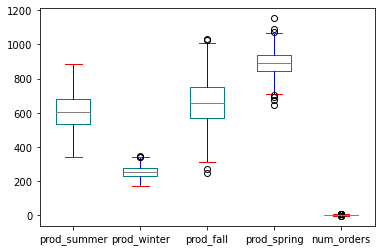

In [272]:
# color box plots

color = {
    "boxes": "teal",
    "whiskers": "blue",
    "medians": "gray",
    "caps": "red",
}
flowers.plot.box(color=color, sym='o');

<AxesSubplot:>

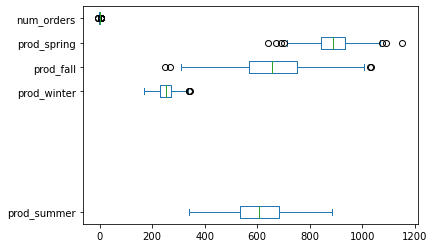

In [276]:
# vert, positions

flowers.plot.box(vert=False, positions=[1, 6, 7, 8, 9])

In [280]:
flowers.species.unique()

array(['Alyssum', 'Lily', 'Jonquil', 'Rose', 'Aster', 'Amaranthus'],
      dtype=object)

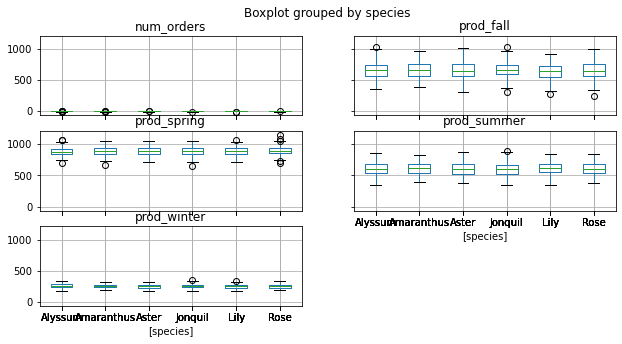

In [278]:
# by 

flowers.boxplot(by='species', figsize=(10, 5));

In [282]:
flowers['day'] = flowers.index.day
flowers['revenue_million'] = np.random.randint(0, 100, size=1000)

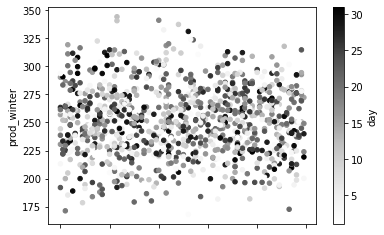

In [287]:
# c

flowers.plot.scatter('revenue_million', 'prod_winter', c='day');

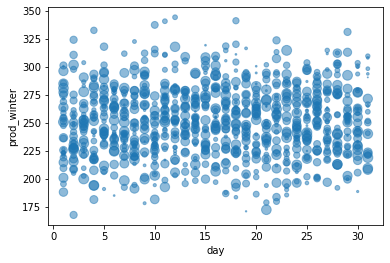

In [291]:
# s

flowers.plot.scatter(
    x='day',
    y='prod_winter',
    alpha=0.5,
    s=flowers['revenue_million']
);

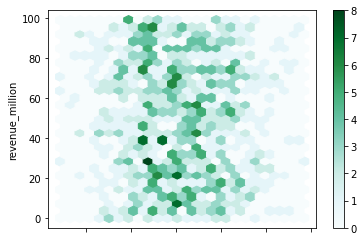

In [293]:
# hexbin
# scatter plots display every point, 
# hexbin plots determine the color of each hexagon by 
# taking the mean of all the price values within that hexagon

flowers.plot.hexbin(
    x='prod_summer', 
    y='revenue_million',
    gridsize=25,
);

### P26 - Vis 2